### Section 1: Understanding Occupancy Grids and Bayesian Updating

---

#### **What is an Occupancy Grid?**
An **occupancy grid** is a way to represent a robot’s environment as a map. The map is divided into a grid of small squares (cells), and each cell has a number that represents the likelihood of that cell being occupied by an obstacle (like a wall, a chair, or another object).

The key idea behind an occupancy grid is simple:
1. If a cell is likely to have an obstacle, it gets a higher value (close to 1).
2. If it’s likely to be empty, it gets a lower value (close to 0).
3. If the robot doesn’t know much about a cell, it starts with a neutral value (usually 0.5).

This grid gives the robot a visual representation of where it can move safely and where it might bump into something.

---



#### **Why Use Occupancy Grids?**
Occupancy grids are essential for autonomous robots because they help with:
- **Navigation**: The robot knows where it can and can’t go.
- **Path Planning**: The robot can calculate the best route to reach a target.
- **Obstacle Avoidance**: The robot can steer clear of obstacles in its path.

These grids are updated dynamically as the robot moves around and gathers new information from its sensors.

---



#### **How Does It Work?**
The robot uses sensors (like sonar, LiDAR, or cameras) to scan its surroundings and determine whether a cell in the grid is occupied or free. However, sensors aren’t perfect—they can make mistakes. For example:
- A sensor might misidentify an obstacle.
- The environment might change (e.g., someone moves a chair).

To deal with this uncertainty, robots use **Bayesian probability** to update the grid.

---



#### **Bayesian Probability: A Simple Explanation**

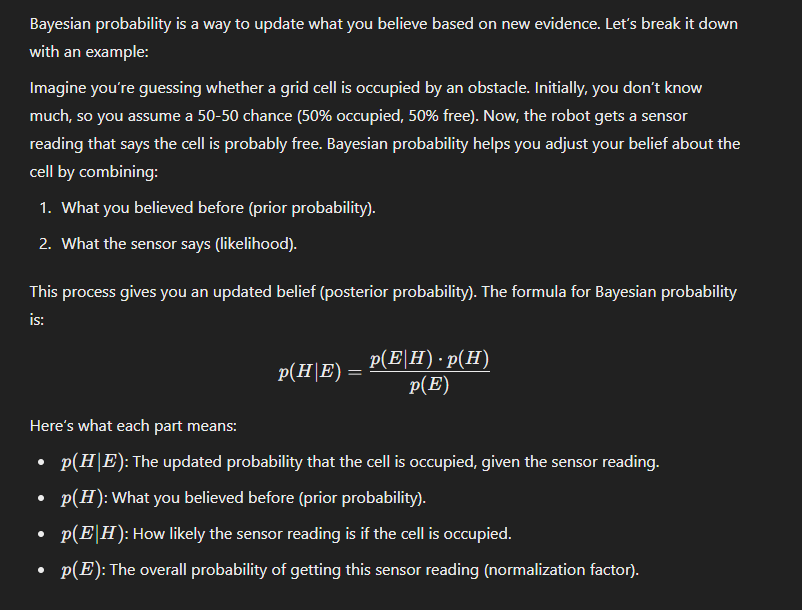


#### **How Does This Apply to Occupancy Grids?**
In an occupancy grid:
- \( H \): The hypothesis that a grid cell is occupied.
- \( E \): The sensor reading (e.g., the distance measured by a sonar).

When the robot gets a new sensor reading, it uses Bayesian probability to update the likelihood for each grid cell:
1. If the sensor suggests the cell is occupied, the probability increases.
2. If the sensor suggests the cell is free, the probability decreases.

This process happens continuously as the robot moves around and collects more data.

---



#### **Recursive Updates**

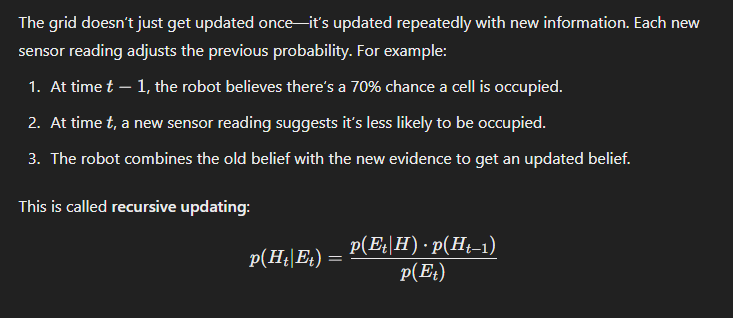


#### **Initial Values**
- All cells start with a neutral probability of 0.5 (equal likelihood of being occupied or free).
- This is called the **prior probability** and reflects that the robot doesn’t know anything about the environment at the beginning.

---

#### **Using Sensors**
The robot relies on sensors to gather information. Different sensors work in different ways:
1. **Sonar**: Measures distances by sending out sound waves and timing how long they take to bounce back.
2. **LiDAR**: Uses lasers to create a detailed 3D map of the surroundings.
3. **Cameras**: Capture images for visual interpretation.

Each sensor has its strengths and weaknesses:
- **Strengths**: Sensors can detect obstacles even in dark or cluttered environments.
- **Weaknesses**: Sensors can make errors, like detecting obstacles that aren’t there (false positives) or missing obstacles that are present (false negatives).

To handle these uncertainties, Bayesian probability comes into play.

---

#### **Sonar Example**
Let’s say the robot has a sonar sensor:
1. The sonar sends out a sound wave.
2. The wave bounces back, and the sensor measures the distance.
3. The robot updates the grid cells based on this information:
   - Cells close to the measured distance are more likely to be occupied.
   - Cells farther away are more likely to be free.

For example:
- If the sonar measures a distance of 2 meters, cells around the 2-meter mark will have a higher probability of being occupied.

---

#### **Challenges with Sensor Data**
Sensors don’t provide perfect information. For instance:
- A sonar sensor has a **cone-shaped field of view**, meaning it detects objects within a certain angle. Not all the detected objects are directly in front of the sensor.
- The environment might have obstacles that block the sensor’s view.

The robot needs to consider these factors when updating the grid. For example:
- Cells outside the sonar cone aren’t updated.
- Cells within the cone are updated based on their distance from the sensor.

---

#### **Key Takeaways**
1. Occupancy grids are a powerful tool for mapping and navigation.
2. Bayesian probability helps robots update their beliefs about the environment based on sensor data.
3. Sensors like sonar and LiDAR provide valuable information but come with uncertainties.
4. Recursive updates ensure the grid stays accurate as the robot collects more data.

---


### Section 2: Sensor Models and Implementation of Occupancy Grids

---

#### **What is a Sensor Model?**
A **sensor model** describes how the robot's sensors interpret the environment and how their readings should update the occupancy grid. This model connects the raw sensor data to probabilities, helping the robot determine how likely it is that a cell in the grid is occupied or free.

The sensor model incorporates:
1. **Sensor characteristics**: Accuracy, range, and noise.
2. **Probability mapping**: Assigning likelihood values to cells based on the sensor data.

For example:
- A LiDAR sensor detects an obstacle 3 meters away. The sensor model determines that cells around the 3-meter mark are likely occupied, while cells closer or farther are more likely free.

---



#### **Types of Sensor Models**
There are two primary approaches to sensor modeling for occupancy grids:
1. **Beam Model**
2. **Inverse Sensor Model**

---

##### **1. Beam Model**
The **beam model** simulates how a sensor beam interacts with the environment. It considers the following:
- The starting point of the beam (the sensor's position).
- The direction the beam is pointing.
- The distance measured by the beam.

**Updating the Grid Using the Beam Model:**
- Cells along the beam’s path are considered free because the beam travels through them without hitting an obstacle.
- The cell at the measured distance is likely occupied since the beam hits something there.

For example:
- A sonar beam detects an obstacle 2 meters away.
- Cells from the sensor to 2 meters are marked as free.
- The cell at 2 meters is marked as occupied.

**Advantages**:
- Simulates the sensor's behavior realistically.
- Helps account for sensor noise and inaccuracies.

**Limitations**:
- Computationally expensive, especially with multiple beams.
- Requires detailed knowledge of the sensor’s characteristics.

---

##### **2. Inverse Sensor Model**
The **inverse sensor model** focuses on the probability of a cell being occupied or free, given the sensor data. It uses a simpler approach compared to the beam model.

**Key Steps:**
- For each sensor reading, the model assigns probabilities to cells based on their location relative to the sensor.
- Cells near the measured distance are more likely occupied.
- Cells farther away are more likely free.

**How It Works in Practice:**
- The sensor measures an obstacle at 3 meters.
- The cells around 3 meters are updated with a higher probability of being occupied.
- Other cells are updated with lower probabilities.

**Advantages**:
- Easier to implement and compute.
- Works well for most real-world applications.

**Limitations**:
- Less precise compared to the beam model.
- Assumes that all cells along the beam's path are equally likely to be free, which may not always be accurate.

---

#### **Sensor Characteristics and Limitations**
Sensors play a critical role in the accuracy of occupancy grids, but they come with certain challenges:

1. **Range Limitations**:
   - Sensors can only detect objects within a certain range. For example, a LiDAR sensor might have a range of 10 meters.
   - Beyond this range, the sensor doesn’t provide any information, leaving those cells with their prior probability.

2. **Field of View**:
   - Sensors have a limited field of view. For instance, a sonar sensor might have a cone-shaped detection area.
   - Cells outside this field are not updated.

3. **Noise and Uncertainty**:
   - Sensors often provide noisy data due to environmental factors (e.g., reflections, surface irregularities).
   - The robot must account for this noise when updating the grid.

4. **False Positives and Negatives**:
   - **False positive**: Detecting an obstacle that isn’t there.
   - **False negative**: Missing an obstacle that is present.
   - These errors can affect the grid's accuracy.

---

#### **Steps to Build an Occupancy Grid**
Creating an occupancy grid involves several key steps:

1. **Initialization**:
   - Start with a grid of cells, each initialized to a neutral probability (e.g., 0.5).

2. **Sensor Data Collection**:
   - Use sensors like sonar, LiDAR, or cameras to gather distance measurements.

3. **Update Cells Using the Sensor Model**:
   - Apply the chosen sensor model (beam model or inverse sensor model) to update the probabilities of the grid cells.
   - For each sensor reading, update:
     - **Occupied cells**: Increase their probability.
     - **Free cells**: Decrease their probability.

4. **Recursive Updates**:
   - Repeat the process as the robot moves and collects new data.
   - Combine the new evidence with the previous probabilities to refine the grid.

---



#### **Practical Implementation of Occupancy Grids**


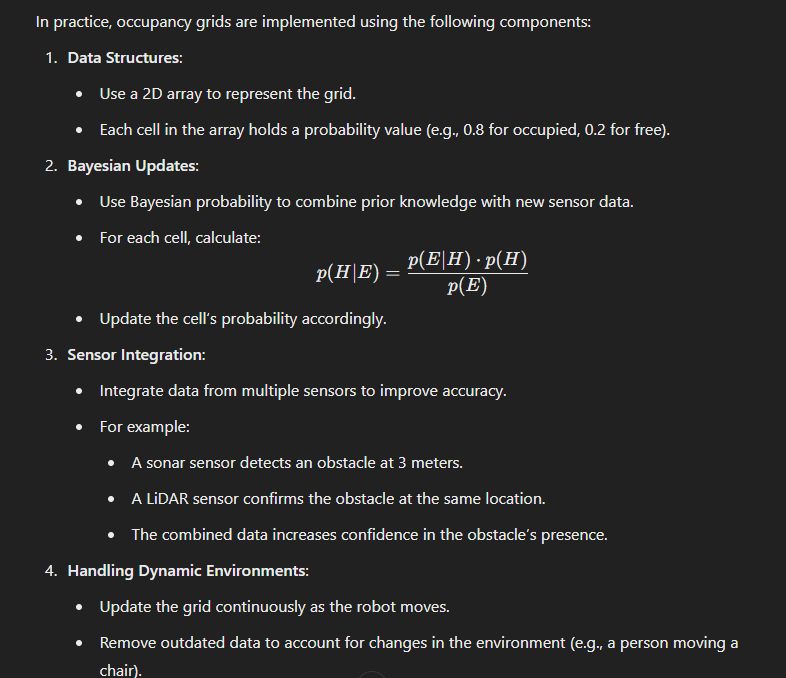


#### **Example: A Robot Using an Occupancy Grid**
Let’s consider a robot navigating a room using an occupancy grid:

1. **Initial Setup**:
   - The robot starts with an empty grid where all cells have a probability of 0.5.

2. **Sensor Readings**:
   - The robot’s sonar sensor detects an obstacle 2 meters ahead.
   - The sensor model updates the grid:
     - Cells at 2 meters: Probability increases (e.g., 0.8).
     - Cells closer than 2 meters: Probability decreases (e.g., 0.2).

3. **Movement and Updating**:
   - The robot moves forward and takes new readings.
   - The grid is updated recursively to reflect the new data.

4. **Path Planning**:
   - The robot uses the grid to plan a path to its destination, avoiding cells with high occupancy probabilities.

---



#### **Challenges in Real-World Applications**
While occupancy grids are highly effective, they face several challenges in real-world scenarios:

1. **Grid Resolution**:
   - High-resolution grids provide more detail but require more memory and processing power.
   - Low-resolution grids are faster but less accurate.

2. **Sensor Limitations**:
   - No sensor is perfect, and errors can accumulate over time.
   - Combining data from multiple sensors can mitigate these issues.

3. **Dynamic Obstacles**:
   - Moving objects (e.g., people, pets) can make the environment unpredictable.
   - The robot must update the grid quickly to reflect these changes.

4. **Computational Complexity**:
   - Processing large grids in real-time can be computationally expensive.
   - Optimizations like dividing the grid into smaller regions or using probabilistic algorithms can help.

---

#### **Key Takeaways from Section 2**
1. **Sensor models** are crucial for interpreting sensor data and updating the grid.
2. The **beam model** and **inverse sensor model** offer different approaches to updating the grid.
3. Real-world challenges like noise, dynamic obstacles, and computational complexity must be addressed for accurate mapping.
4. Combining data from multiple sensors can significantly improve the grid’s reliability.


### Section 3: Advanced Concepts in Occupancy Grids and Their Applications

---

#### **Integration of Occupancy Grids with Localization**

Occupancy grids are not standalone tools; they are often combined with localization techniques to help robots understand and navigate their environment. Localization answers the question, “Where is the robot in the map?” Occupancy grids then guide the robot through this map.

---

##### **Localization Techniques**
Localization methods help determine the robot's position within the environment. Some common approaches include:

1. **Dead Reckoning**:
   - Tracks the robot’s position using odometry data (wheel rotations, direction, and speed).
   - Issues:
     - Errors accumulate over time (drift).
     - Does not account for obstacles.

2. **Particle Filters (Monte Carlo Localization)**:
   - Maintains a set of “particles” representing possible robot positions.
   - Updates particles based on sensor readings and motion.
   - Advantages:
     - Handles uncertainty well.
     - Robust to noise.

3. **Kalman Filters**:
   - Predicts the robot’s position using motion models and updates it using sensor data.
   - Works well in structured environments with linear systems.
   - Limitation:
     - Not ideal for highly dynamic or unstructured environments.

4. **Simultaneous Localization and Mapping (SLAM)**:
   - Simultaneously builds the occupancy grid and localizes the robot within it.
   - Combines sensor data, motion models, and probabilistic algorithms to create a map while tracking the robot's position.
   - Widely used for autonomous navigation.

---

##### **Using Occupancy Grids for Localization**
Occupancy grids play a key role in localization by providing:
1. **Reference for Sensor Data**:
   - Sensor readings are matched against the occupancy grid to estimate the robot’s position.
   - For example:
     - A LiDAR scan detects a wall.
     - The robot compares this reading to the map to determine where it is.

2. **Probabilistic Updates**:
   - Localization algorithms like particle filters use occupancy grids to update the probability of the robot’s position.
   - As new data comes in, the grid helps refine the robot’s estimate.

3. **Handling Uncertainty**:
   - Real-world environments are noisy and dynamic.
   - The grid helps account for this uncertainty by maintaining probabilistic representations of occupied and free spaces.

---

#### **Path Planning with Occupancy Grids**

Path planning is the process of finding the safest and most efficient route from the robot’s current position to its destination. Occupancy grids provide a foundation for path planning by identifying areas that are free to navigate and areas that are occupied or risky.

---

##### **Steps in Path Planning**
1. **Grid Analysis**:
   - Identify free and occupied cells in the occupancy grid.
   - Mark cells as:
     - **Free**: Safe to navigate.
     - **Occupied**: To be avoided.

2. **Define a Cost Function**:
   - Assign costs to cells based on their proximity to obstacles.
   - For example:
     - A cell far from obstacles has a low cost (safe to navigate).
     - A cell near an obstacle has a high cost (risky).

3. **Search Algorithms**:
   - Use algorithms to find the optimal path through the grid. Common algorithms include:
     - **A\*** (A-star):
       - Finds the shortest path by considering the cost of moving through each cell.
       - Balances exploration and efficiency.
     - **Dijkstra’s Algorithm**:
       - Explores all possible paths to find the shortest one.
       - Slower than A\* but guarantees optimal results.
     - **Probabilistic Roadmaps (PRM)**:
       - Samples random points in the free space and connects them to form a network.
       - Suitable for large or complex environments.

4. **Path Smoothing**:
   - Once a path is found, apply smoothing techniques to make the route more natural for the robot to follow.
   - For example:
     - Replace sharp turns with gradual curves.

---

##### **Dynamic Path Planning**
In dynamic environments, obstacles can move, requiring the robot to adapt its path in real time.

1. **Reactive Path Planning**:
   - Continuously updates the path as new sensor data comes in.
   - Relies on the occupancy grid to identify changes in the environment.
   - Example:
     - A robot detects a moving person.
     - It recalculates its path to avoid the person.

2. **Predictive Path Planning**:
   - Anticipates changes in the environment based on patterns or prior knowledge.
   - Example:
     - A robot observes that a door opens every 30 seconds and plans its path accordingly.

---

##### **Example: Robot Navigation with Path Planning**
1. The robot starts at point A with a goal to reach point B.
2. It uses the occupancy grid to identify free cells and calculate a path using A\*.
3. Along the way, a dynamic obstacle (e.g., a person) appears.
4. The robot updates the grid, identifies the new obstacle, and recalculates its path to avoid it.
5. It reaches point B safely.

---

#### **Applications of Occupancy Grids**

Occupancy grids are widely used in various fields and industries:

1. **Autonomous Vehicles**:
   - Self-driving cars use occupancy grids to map their surroundings, identify obstacles, and plan safe routes.
   - Grids integrate data from cameras, LiDAR, radar, and other sensors.

2. **Robotics**:
   - Robots use grids for indoor navigation in warehouses, offices, and homes.
   - Applications include cleaning robots, delivery robots, and industrial automation.

3. **Search and Rescue**:
   - Robots in disaster scenarios use occupancy grids to map collapsed buildings or hazardous areas.
   - Helps locate survivors and plan safe rescue paths.

4. **Military and Defense**:
   - Drones and ground robots use occupancy grids for reconnaissance and surveillance.
   - Grids help identify enemy positions and plan stealthy routes.

5. **Gaming and Virtual Reality**:
   - Occupancy grids are used in video games to model environments and control AI characters.
   - In virtual reality, grids help simulate realistic environments.

6. **Agriculture**:
   - Autonomous tractors and drones use grids to map fields and navigate around obstacles like trees and rocks.

7. **Healthcare**:
   - Robots in hospitals use occupancy grids for navigation, such as delivering medications or guiding patients.

---

#### **Limitations of Occupancy Grids**

While occupancy grids are powerful tools, they have limitations:

1. **Memory Usage**:
   - High-resolution grids require significant memory, especially for large environments.
   - Solutions:
     - Use hierarchical grids or quadtrees to represent space more efficiently.

2. **Computational Overhead**:
   - Real-time updates and path planning can be computationally intensive.
   - Solutions:
     - Use hardware acceleration or simplify the grid representation.

3. **Dynamic Environments**:
   - Rapidly changing environments can lead to outdated grids.
   - Solutions:
     - Incorporate faster sensors and algorithms for real-time updates.

4. **Sensor Dependency**:
   - The accuracy of the grid depends on the quality and placement of sensors.
   - Poor sensors or placement can lead to incomplete or incorrect grids.

5. **Complex Environments**:
   - Environments with multiple levels (e.g., stairs, bridges) are difficult to represent in a 2D grid.
   - Solutions:
     - Use 3D grids or voxel maps for complex environments.

---

#### **Future of Occupancy Grids**

Advancements in technology are addressing these limitations and expanding the potential of occupancy grids:

1. **3D Occupancy Grids**:
   - Represent environments in three dimensions for applications like drone navigation and underwater exploration.

2. **Machine Learning Integration**:
   - Neural networks can enhance grid accuracy by learning patterns in sensor data.
   - Example:
     - Identifying and predicting the behavior of dynamic obstacles.

3. **Edge Computing**:
   - Offloading computations to edge devices reduces latency and improves real-time performance.

4. **Cloud Integration**:
   - Sharing grids across multiple robots enables collaborative mapping and navigation.
   - Example:
     - A fleet of delivery robots sharing maps to optimize routes.

5. **Advances in Sensor Technology**:
   - High-resolution LiDAR, depth cameras, and ultra-wideband sensors are improving grid accuracy.

---

#### **Conclusion**

Occupancy grids are a cornerstone of robotics and autonomous systems, enabling accurate environment mapping and navigation. From basic grid creation to advanced integration with localization and path planning, they are indispensable for solving complex real-world problems. By addressing challenges and leveraging emerging technologies, occupancy grids will continue to play a pivotal role in shaping the future of autonomous systems.